### AIT 614 - Big Data Essentials <br>
#### Team-5 Project Working System
<hr>

Student's Full Name: Shanmukha Rao Vuriti, Veena Bathula, Utkarsh Ganjihal, Manish Chamarajanagar Mahesh and Vijeth Jayashekar <br>
Course: AIT 614 - Big Data Essentials <br>
Course Section #: 008<br>


In [0]:
# Importing dataset

data = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/svuriti@gmu.edu/adult_100.csv")

In [0]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, sum

In [0]:
data.head(5)

Out[4]: [Row(age='90', workclass='?', fnlwgt='77053', education='HS-grad', education_num='9', marital_status='Widowed', occupation='?', relationship='Not-in-family', race='White', sex='Female', capital_gain='0', capital_loss='4356', hours_per_week='40', native_country='United-States', income='<=50K'),
 Row(age='82', workclass='Private', fnlwgt='132870', education='HS-grad', education_num='9', marital_status='Widowed', occupation='Exec-managerial', relationship='Not-in-family', race='White', sex='Female', capital_gain='0', capital_loss='4356', hours_per_week='18', native_country='United-States', income='<=50K'),
 Row(age='66', workclass='?', fnlwgt='186061', education='Some-college', education_num='10', marital_status='Widowed', occupation='?', relationship='Unmarried', race='Black', sex='Female', capital_gain='0', capital_loss='4356', hours_per_week='40', native_country='United-States', income='<=50K'),
 Row(age='54', workclass='Private', fnlwgt='140359', education='7th-8th', education

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Calculating the mode of the workclass column
workclass_mode = data.groupBy("workclass").count().orderBy(col("count").desc()).first()["workclass"]

# Replacing '?' in the workclass column with the mode
data = data.withColumn("workclass", when(col("workclass") == "?", workclass_mode).otherwise(col("workclass")))


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Calculating the mode of the occupation column
occupation_counts = data.groupBy("occupation").count()
windowSpec = Window.orderBy(col("count").desc())
occ_mode = occupation_counts.withColumn("row_number", F.row_number().over(windowSpec)).where(col("row_number") == 1).select("occupation").collect()[0][0]

# Replacing '?' in the occupation column with the mode
data = data.withColumn("occupation", when(col("occupation") == "?", occ_mode).otherwise(col("occupation")))


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Calculating the mode of the native_country column
nc_counts = data.groupBy("native_country").count()
windowSpec = Window.orderBy(col("count").desc())
nc_mode = nc_counts.withColumn("row_number", F.row_number().over(windowSpec)).where(col("row_number") == 1).select("native_country").collect()[0][0]

# Replacing '?' in the native_country column with the mode
data = data.withColumn("native_country", when(col("native_country") == "?", nc_mode).otherwise(col("native_country")))


In [0]:
data.head(5)

Out[8]: [Row(age='90', workclass='Private', fnlwgt='77053', education='HS-grad', education_num='9', marital_status='Widowed', occupation='Prof-specialty', relationship='Not-in-family', race='White', sex='Female', capital_gain='0', capital_loss='4356', hours_per_week='40', native_country='United-States', income='<=50K'),
 Row(age='82', workclass='Private', fnlwgt='132870', education='HS-grad', education_num='9', marital_status='Widowed', occupation='Exec-managerial', relationship='Not-in-family', race='White', sex='Female', capital_gain='0', capital_loss='4356', hours_per_week='18', native_country='United-States', income='<=50K'),
 Row(age='66', workclass='Private', fnlwgt='186061', education='Some-college', education_num='10', marital_status='Widowed', occupation='Prof-specialty', relationship='Unmarried', race='Black', sex='Female', capital_gain='0', capital_loss='4356', hours_per_week='40', native_country='United-States', income='<=50K'),
 Row(age='54', workclass='Private', fnlwgt='1

In [0]:
# Checking Null values

from pyspark.sql.functions import col,isnan, when, count
data_columns= ['workclass','occupation','native_country']

# Checking whether null values are present or not
data_2 = data.select([count(when(col(c) == '?', c)).alias(c) for c in data_columns])
 
# Showing the resulting DataFrame
data_2.show()

+---------+----------+--------------+
|workclass|occupation|native_country|
+---------+----------+--------------+
|        0|         0|             0|
+---------+----------+--------------+



In [0]:
# Exploratory Data Analysis

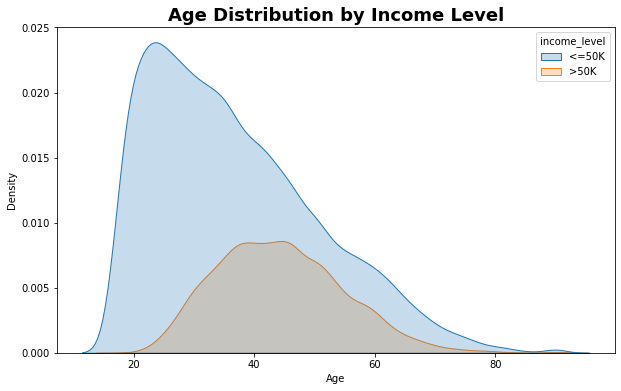

In [0]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType, IntegerType
import seaborn as sb
import matplotlib.pyplot as plt

data = data.withColumn("age", col("age").cast(IntegerType()))

# Adjusting the function to return the string values
def income_to_level(income):
    return '>50K' if income == '>50K' else '<=50K'

income_to_level_udf = udf(income_to_level, StringType())
data = data.withColumn("income_level", income_to_level_udf(col("income")))

# Converting the PySpark DataFrame to a Pandas DataFrame
pandas_df = data.toPandas()

# Plotting for age distribution by income level
plt.figure(figsize=(10, 6))
sb.kdeplot(data=pandas_df, x="age", hue="income_level", shade=True)
plt.title('Age Distribution by Income Level', fontsize=18, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


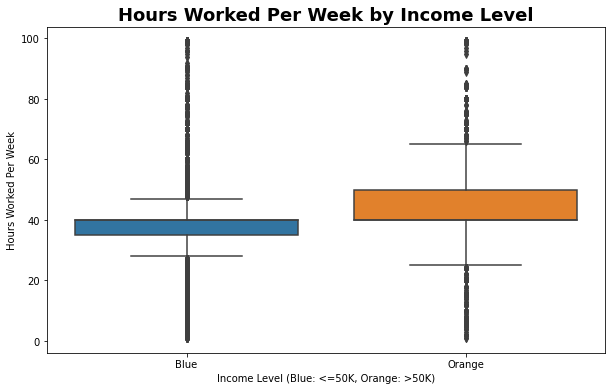

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import seaborn as sb
import matplotlib.pyplot as plt

data = data.withColumn("hours_per_week", data["hours_per_week"].cast(IntegerType()))

# Mapping 'income' to color names
def income_to_color(income):
    return 'Orange' if income == '>50K' else 'Blue'

income_to_color_udf = udf(income_to_color, StringType())
data = data.withColumn("income_color", income_to_color_udf(data["income"]))

# Converting the PySpark DataFrame to a Pandas DataFrame
pandas_df = data.toPandas()

# Creating a box plot with color names
plt.figure(figsize=(10, 6))
sb.boxplot(x="income_color", y="hours_per_week", data=pandas_df)
plt.title('Hours Worked Per Week by Income Level', fontsize=18, fontweight='bold')
plt.xlabel('Income Level (Blue: <=50K, Orange: >50K)')
plt.ylabel('Hours Worked Per Week')
plt.show()


<Figure size 864x576 with 0 Axes>

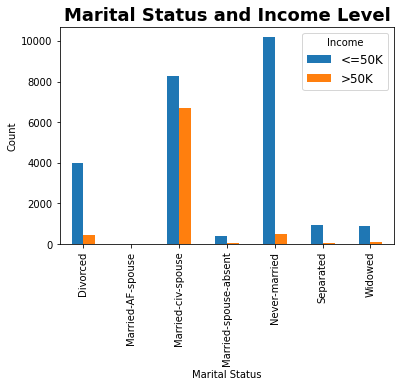

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Converting the Spark DataFrame to a Pandas DataFrame
pandas_df = data.toPandas()

# Creating grouped bar chart
plt.figure(figsize=(12, 8))

# Grouped bar chart for marital status by income
grouped_data = pandas_df.groupby(['marital_status', 'income']).size().unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=False)
plt.title('Marital Status and Income Level', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income', fontsize=12)
plt.xticks(rotation=90)  # Rotating x-axis labels to 90 degrees
plt.show()


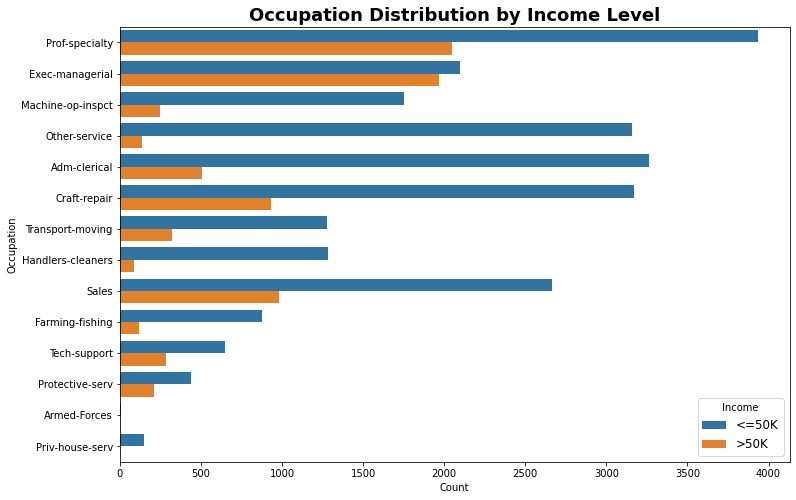

In [0]:
import seaborn as sb

# Converting the Spark DataFrame to a Pandas DataFrame
pandas_df = data.toPandas()

plt.figure(figsize=(12, 8))
sb.countplot(y="occupation", hue="income", data=pandas_df)
plt.title('Occupation Distribution by Income Level', fontsize=18, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Income', fontsize=12)
plt.show()


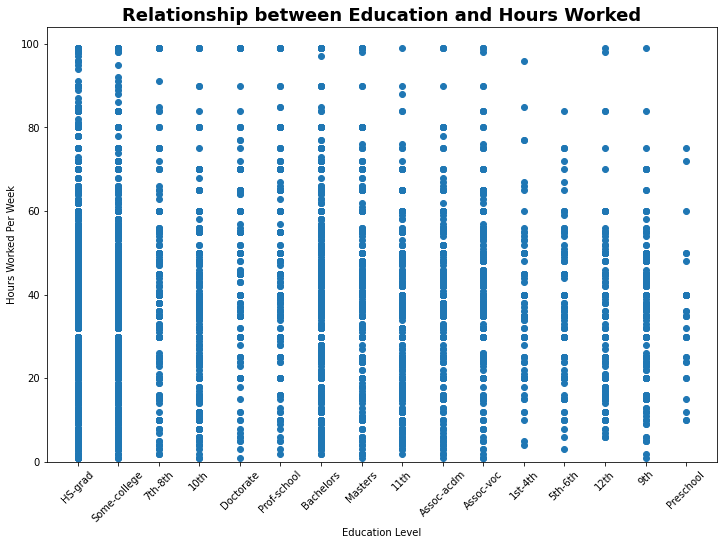

In [0]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = data.toPandas()

# Create a scatter plot for education level vs. hours worked
plt.figure(figsize=(12, 8))
plt.scatter(data=pandas_df, x="education", y="hours_per_week")
plt.title('Relationship between Education and Hours Worked', fontsize=18, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Hours Worked Per Week')

# Adjust the Y-axis limits
plt.ylim(0, pandas_df["hours_per_week"].max() + 5)  # Adjust the +5 to fit your desired range
plt.xticks(rotation=45)
plt.show()


In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# Converting string columns to integer
data = data.withColumn("age", data["age"].cast(IntegerType()))
data = data.withColumn("fnlwgt", data["fnlwgt"].cast(IntegerType()))
data = data.withColumn("education_num", data["education_num"].cast(IntegerType()))
data = data.withColumn("capital_gain", data["capital_gain"].cast(IntegerType()))
data = data.withColumn("capital_loss", data["capital_loss"].cast(IntegerType()))
data = data.withColumn("hours_per_week", data["hours_per_week"].cast(IntegerType()))

In [0]:
# Logistic Regression

In [0]:
# Predictive Analysis


train_data, test_data = data.randomSplit([0.7, 0.3], seed=100)
print(train_data.cache().count()) # Cache because accessing training data multiple times
print(test_data.count())

22832
9729


In [0]:
train_data.head(5)

Out[22]: [Row(age=17, workclass='Federal-gov', fnlwgt=99893, education='11th', education_num=7, marital_status='Never-married', occupation='Adm-clerical', relationship='Not-in-family', race='Black', sex='Female', capital_gain=0, capital_loss=1602, hours_per_week=40, native_country='United-States', income='<=50K', income_level='<=50K', income_color='Blue'),
 Row(age=17, workclass='Local-gov', fnlwgt=32124, education='9th', education_num=5, marital_status='Never-married', occupation='Other-service', relationship='Own-child', race='Black', sex='Male', capital_gain=0, capital_loss=0, hours_per_week=9, native_country='United-States', income='<=50K', income_level='<=50K', income_color='Blue'),
 Row(age=17, workclass='Local-gov', fnlwgt=39815, education='10th', education_num=6, marital_status='Never-married', occupation='Other-service', relationship='Own-child', race='White', sex='Female', capital_gain=0, capital_loss=0, hours_per_week=25, native_country='United-States', income='<=50K', incom

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
 
categoricalCols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex"]
 
# The following two lines are estimators. They return functions that we will later apply to transform the dataset.
stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=[x + "Index" for x in categoricalCols]) 
encoder = OneHotEncoder(inputCols=stringIndexer.getOutputCols(), outputCols=[x + "OHE" for x in categoricalCols]) 

In [0]:
stringIndexerModel = stringIndexer.fit(train_data)

In [0]:
labelToIndex = StringIndexer(inputCol="income", outputCol="label")

In [0]:
from pyspark.ml.feature import VectorAssembler
 
# This includes both the numeric columns and the one-hot encoded binary vector columns in our dataset.
numericCols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "OHE" for c in categoricalCols] + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

In [0]:
# Defining the model

from pyspark.ml.classification import LogisticRegression
 
logistic_model = LogisticRegression(featuresCol="features", labelCol="label", regParam=1.0)

In [0]:
#Building the model
from pyspark.ml import Pipeline
 
# Defining the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[stringIndexer, encoder, labelToIndex, vecAssembler, logistic_model])
 
# Defining the pipeline model.
pipelineModel = pipeline.fit(train_data)
 
# Applying the pipeline model to the test dataset.
pred_data = pipelineModel.transform(test_data)

In [0]:
display(pred_data.select("features", "label", "prediction", "probability"))

features label prediction probability Map(vectorType -> sparse, length -> 57, indices -> List(2, 12, 23, 31, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 148194.0, 7.0, 12.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8939950117816327, 0.10600498821836735)) Map(vectorType -> sparse, length -> 57, indices -> List(2, 12, 23, 29, 43, 46, 50, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 195262.0, 7.0, 35.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8671709830769182, 0.1328290169230818)) Map(vectorType -> sparse, length -> 57, indices -> List(2, 12, 23, 28, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 244856.0, 7.0, 40.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8660584099964869, 0.13394159000351313)) Map(vectorType -> sparse, length -> 57, indices -> List(2, 18, 23, 31, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 340043.0, 8.0, 12.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8895370447916655, 0.11046295520833449)) Map(vectorType -> sparse, length -> 57, indices -> List(14, 23, 28, 43, 46, 50, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 237272.0, 6.0, 30.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8658835787557493, 0.13411642124425072)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 14, 23, 33, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 25690.0, 6.0, 10.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.9108807566126118, 0.08911924338738819)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 14, 23, 32, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 27032.0, 6.0, 12.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8957497160646595, 0.10425028393534053)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 14, 23, 37, 43, 46, 50, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 32607.0, 6.0, 20.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8967300522662357, 0.1032699477337643)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 12, 23, 33, 43, 46, 50, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 34019.0, 7.0, 20.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8947939348724087, 0.10520606512759134)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 14, 23, 33, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 41865.0, 6.0, 25.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.9046273340878368, 0.0953726659121632)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 14, 23, 37, 43, 46, 50, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 41979.0, 6.0, 40.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.8871587385840682, 0.11284126141593176)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 12, 23, 33, 43, 46, 50, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 46496.0, 7.0, 5.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.9015717748230488, 0.09842822517695116)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 12, 23, 40, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 47199.0, 7.0, 24.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.9025259567586932, 0.09747404324130682)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 12, 23, 33, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 17.0, 47425.0, 7.0, 15.0)) 0.0 0.0 Map(vectorType -> dense, length -> 2, values -> List(0.9063825964372012, 0.0936174035627988)) Map(vectorType -> sparse, length -> 57, indices -> List(0, 12, 23, 28, 43, 46, 51, 52, 53, 56), values -> List(1.0, 1.0, 1

In [0]:
# Evaluating the model

display(pipelineModel.stages[-1], pred_data.drop("prediction", "rawPrediction", "probability"), "ROC")

False Positive Rate True Positive Rate Threshold 0.0 0.0 0.5068496738015091 0.0 0.034482758620689655 0.5068496738015091 0.0 0.06896551724137931 0.4731687689232107 0.0 0.10344827586206896 0.45822572709149834 0.0 0.13793103448275862 0.45443302369813665 0.0 0.1724137931034483 0.4533393581839409 0.0 0.20689655172413793 0.4532585656676149 0.0 0.2413793103448276 0.44180558802667014 0.0 0.27586206896551724 0.414313142004737 0.0 0.3103448275862069 0.3949278302759591 0.011494252873563218 0.3103448275862069 0.39289425991923044 0.011494252873563218 0.3448275862068966 0.38800693640586137 0.011494252873563218 0.3793103448275862 0.3828614792056184 0.011494252873563218 0.41379310344827586 0.38028218838453365 0.011494252873563218 0.4482758620689655 0.3771592663059189 0.011494252873563218 0.4827586206896552 0.37066060111067156 0.022988505747126436 0.4827586206896552 0.35921228312817544 0.022988505747126436 0.5172413793103449 0.35783915326929516 0.022988505747126436 0.5517241379310345 0.3563240916860553 0.034482758620689655 0.5517241379310345 0.35231115277620606 0.04597701149425287 0.5517241379310345 0.34970104043469974 0.04597701149425287 0.5862068965517241 0.3479702926669387 0.04597701149425287 0.6206896551724138 0.34533325902280465 0.04597701149425287 0.6551724137931034 0.33092838928376356 0.04597701149425287 0.6896551724137931 0.3266562492700308 0.04597701149425287 0.7241379310344828 0.3233942539736987 0.04597701149425287 0.7586206896551724 0.31408818860432486 0.05747126436781609 0.7586206896551724 0.3140454566487635 0.06896551724137931 0.7586206896551724 0.31377960153038476 0.06896551724137931 0.7931034482758621 0.3137301520243948 0.08045977011494253 0.7931034482758621 0.3117568560376818 0.09195402298850575 0.7931034482758621 0.30342099009494783 0.10344827586206896 0.7931034482758621 0.3032169171785848 0.11494252873563218 0.7931034482758621 0.30313515149268966 0.12643678160919541 0.7931034482758621 0.3014554373143028 0.12643678160919541 0.8275862068965517 0.29997098107366915 0.13793103448275862 0.8275862068965517 0.2979266424841821 0.14942528735632185 0.8275862068965517 0.29461096173749546 0.16091954022988506 0.8275862068965517 0.29330199784686184 0.16091954022988506 0.8620689655172413 0.29121872800326876 0.1724137931034483 0.8620689655172413 0.286627720215737 0.1839080459770115 0.8620689655172413 0.28492620544983915 0.1839080459770115 0.896551724137931 0.2821455271706623 0.19540229885057472 0.896551724137931 0.27948411331078993 0.20689655172413793 0.896551724137931 0.277835757934503 0.20689655172413793 0.9310344827586207 0.27693050867486546 0.21839080459770116 0.9310344827586207 0.27342969243704407 0.22988505747126436 0.9310344827586207 0.2732573623902763 0.2413793103448276 0.9310344827586207 0.2719266809521881 0.25287356321839083 0.9310344827586207 0.27015196382154194 0.26436781609195403 0.9310344827586207 0.267953589189425 0.27586206896551724 0.9310344827586207 0.26590136062113967 0.28735632183908044 0.9310344827586207 0.2612464608013031 0.2988505747126437 0.9310344827586207 0.2603947112854388 0.3103448275862069 0.9310344827586207 0.25779551535666345 0.3218390804597701 0.9310344827586207 0.2551104221753203 0.3333333333333333 0.9310344827586207 0.25402206556083173 0.3333333333333333 0.9655172413793104 0.25068338288685177 0.3448275862068966 0.9655172413793104 0.24903437200406497 0.3563218390804598 0.9655172413793104 0.24755987351658326 0.367816091954023 0.9655172413793104 0.2470950012214045 0.3793103448275862 0.9655172413793104 0.2461900766447115 0.39080459770114945 0.9655172413793104 0.24454833520957664 0.40229885057471265 0.9655172413793104 0.24311433690162354 0.41379310344827586 0.9655172413793104 0.24099049642994685 0.42528735632183906 0.9655172413793104 0.23999873285431184 0.4367816091954023 0.9655172413793104 0.23217045598385078 0.4482758620689655 0.9655172413793104 0.2292267550201893 0.45977011494252873 0.9655172413793104 0.22890152574015254 0.47126436781609193 0.9655172413793104 0.22846430880780766 0.4827586206896552 0.96551724137

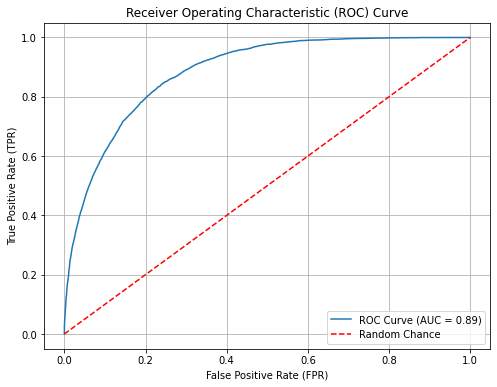

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

# Evaluate the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
roc_auc = evaluator.evaluate(pred_data)

# Get the ROC curve data
lr_model = pipelineModel.stages[-1]  # Assuming the last stage is the Logistic Regression model
roc = lr_model.summary.roc.toPandas()

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Binary Classification Evaluation
bcEvaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
print(f"Area under ROC curve: {bcEvaluator.evaluate(pred_data)}")

# Multiclass Classification Evaluations
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(pred_data)}")

mcEvaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
print(f"Weighted Recall: {mcEvaluator.evaluate(pred_data)}")

mcEvaluator = MulticlassClassificationEvaluator(metricName="f1")
print(f"F1 score: {mcEvaluator.evaluate(pred_data)}")

mcEvaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")
print(f"Weighted Precision: {mcEvaluator.evaluate(pred_data)}")

# Confusion Matrix
predictionAndLabels = pred_data.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

confusionMatrix = metrics.confusionMatrix()
print("Confusion Matrix:")
print(confusionMatrix)


Area under ROC curve: 0.8862014280408083
Accuracy: 0.7738719292835852
Weighted Recall: 0.7738719292835852
F1 score: 0.6861726691684774
Weighted Precision: 0.8155679579057438


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
DenseMatrix([[7.418e+03, 5.000e+00],
             [2.195e+03, 1.110e+02]])


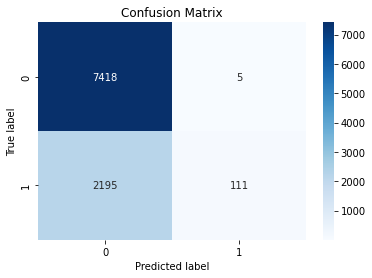

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get the confusion matrix as a NumPy array
confusionMatrix = metrics.confusionMatrix().toArray()
 
# Plot the confusion matrix as a heatmap
sns.heatmap(confusionMatrix, annot=True, fmt="g", cmap="Blues")
 
# Add labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
 
# Display the plot
plt.show()

In [0]:
# Gradient Boosting

In [0]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Converting Spark DataFrame to Pandas DataFrame
data_pandas = data.toPandas()

In [0]:
# Defining features and target variable
features = ['age', 'education_num', 'occupation', 'capital_gain', 'capital_loss', 'hours_per_week']
target = 'income'

In [0]:
# Define categorical columns and encode them
categorical_columns = ['age', 'education_num', 'occupation', 'capital_gain', 'capital_loss', 'hours_per_week']

In [0]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    col_mode = data_pandas[col].mode()[0]
    data_pandas[col] = data_pandas[col].replace('?', col_mode)
    data_pandas[col] = label_encoder.fit_transform(data_pandas[col])

In [0]:
# Define features and target variable
features = categorical_columns
target = 'income'

In [0]:
# Encode the target variable
label_encoder = LabelEncoder()
data_pandas[target] = label_encoder.fit_transform(data_pandas[target])

In [0]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pandas[features], data_pandas[target], test_size=0.2, random_state=42)

In [0]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [0]:
# Calculating evaluation metrics

accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred, pos_label=label_encoder.transform(['>50K'])[0], average='binary')
recall = recall_score(y_test, xgb_pred, pos_label=label_encoder.transform(['>50K'])[0], average='binary')
f1 = f1_score(y_test, xgb_pred, pos_label=label_encoder.transform(['>50K'])[0], average='binary')

In [0]:
# Displaing evaluation metrics
print("XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

XGBoost Classifier Metrics:
Accuracy: 0.8498387839705205
Precision: 0.7860798362333674
Recall: 0.4996746909564086
F1 Score: 0.6109785202863962


In [0]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4976
           1       0.79      0.50      0.61      1537

    accuracy                           0.85      6513
   macro avg       0.82      0.73      0.76      6513
weighted avg       0.84      0.85      0.84      6513



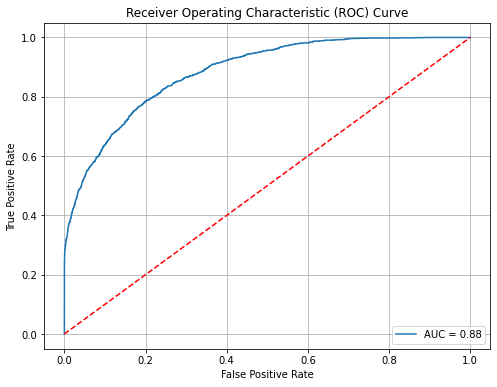

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

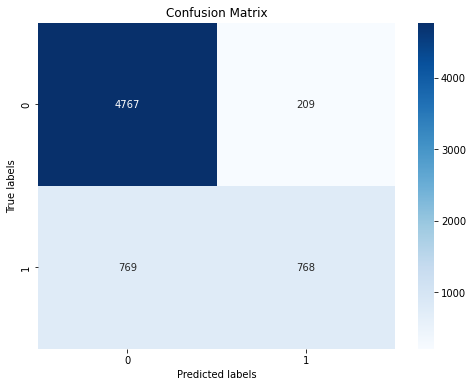

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [0]:
# KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
data_pandas = data.toPandas()


In [0]:
# Defining the features and target variable

features = ['age', 'education_num', 'occupation', 'capital_gain', 'capital_loss', 'hours_per_week']
target = 'income'

In [0]:
# Label encode categorical columns

label_encoder = LabelEncoder()
for col in ['occupation']:  # Add other categorical columns as needed
    data_pandas[col] = label_encoder.fit_transform(data_pandas[col].astype(str))

In [0]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pandas[features], data_pandas[target], test_size=0.2, random_state=42)

In [0]:
# KNN Classifier

k = 5  # Define the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [0]:
# Calculating evaluation metrics

accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, pos_label='>50K', average='binary')
recall = recall_score(y_test, knn_pred, pos_label='>50K', average='binary')
f1 = f1_score(y_test, knn_pred, pos_label='>50K', average='binary')

In [0]:
# Displaying evaluation metrics

print("KNN Classifier Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


KNN Classifier Metrics:
Accuracy: 0.8334101028711807
Precision: 0.6931623931623931
Recall: 0.52765126870527
F1 Score: 0.5991872922053935


In [0]:
# Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[4617  359]
 [ 726  811]]


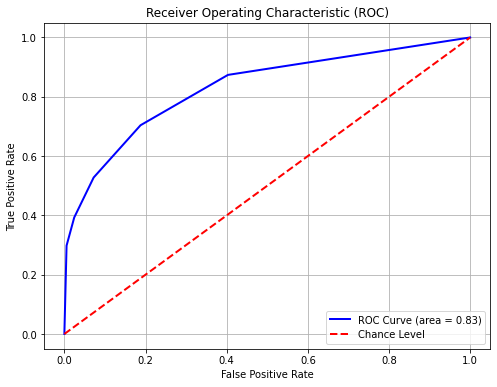

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fitting the KNN model
knn.fit(X_train, y_train)

# Getting prediction probabilities
y_scores = knn.predict_proba(X_test)[:, 1]  # Getting the probabilities of the positive class

# Generatingf ROC curve values: fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label='>50K')

# Calculating AUC
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance Level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


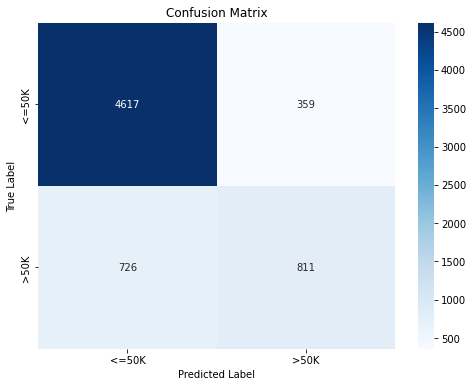

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating the confusion matrix
cm = confusion_matrix(y_test, knn_pred, labels=knn.classes_)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [0]:
# Random Forest Classifier 

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.sql import SparkSession

data_pandas = data.toPandas()

In [0]:
# Defining categorical columns

categorical_cols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex"]

In [0]:
# Index categorical columns

indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_cols]

In [0]:
# Assemble indexed categorical columns and numeric columns into a single feature vector

assembler = VectorAssembler(inputCols=[col+"_index" for col in categorical_cols] + ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"], outputCol="features")

In [0]:
# Label indexing for the 'income' column
label_indexer = StringIndexer(inputCol="income", outputCol="label")

In [0]:
# Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

In [0]:
# Create a pipeline
pipeline = Pipeline(stages=indexers + [assembler, label_indexer, rf])

In [0]:
# Split data into train and test sets
train, test = data.randomSplit([0.8, 0.2], seed=42)


In [0]:
# Fitting the pipeline to training data
model = pipeline.fit(train)

In [0]:
# Making predictions
predictions = model.transform(test)

In [0]:
# Evaluation metrics - Accuracy, Precision, Recall, F1-score
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Precision
precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision").evaluate(predictions)

# Recall
recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall").evaluate(predictions)

# F1-score
f1_score = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1").evaluate(predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.840863531225906
Precision: 0.834868435387089
Recall: 0.840863531225906
F1 Score: 0.8268914755513556


In [0]:
# Confusion Matrix
prediction_label = predictions.select("prediction", "label")
prediction_label_rdd = prediction_label.rdd.map(lambda row: (float(row["prediction"]), float(row["label"])))
metrics = MulticlassMetrics(prediction_label_rdd)

conf_matrix = metrics.confusionMatrix().toArray()
print("Confusion Matrix:")
print(conf_matrix)

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
[[4671.  212.]
 [ 820.  782.]]


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


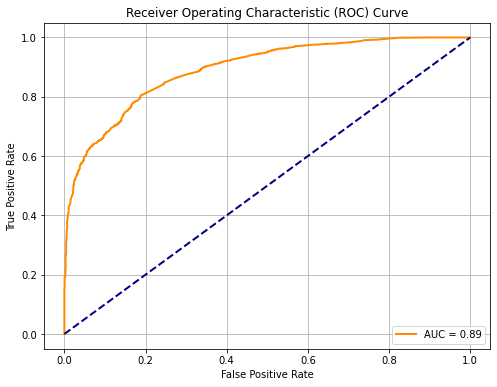

In [0]:
# ROC and AUC
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

results = predictions.select(['probability', 'label'])
results_collect = results.collect()

results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
prediction_and_labels = spark.sparkContext.parallelize(results_list)

metrics = BinaryClassificationMetrics(prediction_and_labels)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve([i[1] for i in results_list], [i[0] for i in results_list])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

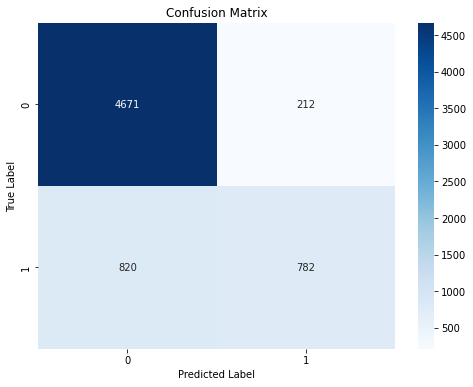

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_array = np.array(conf_matrix)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_array, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Logistic Regression Model after converting the "income" column into a categorical outcome column "income_variable" by taking 'income >50K' == '1' and 'income <=50K' == '0' to perform model training.
<hr>

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Initialize Spark session
spark = SparkSession.builder.appName("LogisticRegression").getOrCreate()

# Load the data
Raw_data = spark.read.csv("dbfs:/FileStore/shared_uploads/svuriti@gmu.edu/adult_100.csv", header=True, inferSchema=True)


# Assuming 'data' is your initial DataFrame
Raw_data = Raw_data.withColumn("income_variable", when(Raw_data["income"] == ">50K", 1).otherwise(0))


In [0]:
train, test = Raw_data.randomSplit([0.8, 0.2], seed=42)

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Define the categorical columns
categoricalCols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex"]

# StringIndexer to convert string values to numerical indices
indexers = [StringIndexer(inputCol=c, outputCol=c + "_indexed", handleInvalid="skip") for c in categoricalCols]

# OneHotEncoder to convert categorical indices into binary vectors
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol() + "_encoded") for indexer in indexers]

In [0]:
stringIndexerModel = stringIndexer.fit(train)

In [0]:
labelToIndex = StringIndexer(inputCol="income_variable", outputCol="label")

In [0]:
from pyspark.ml.feature import VectorAssembler
 
# This includes both the numeric columns and the one-hot encoded binary vector columns in our dataset.
numericCols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "OHE" for c in categoricalCols] + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

In [0]:
# Defining the model

from pyspark.ml.classification import LogisticRegression
 
logistic_model = LogisticRegression(featuresCol="features", labelCol="label", regParam=1.0)

In [0]:
#Building the model
from pyspark.ml import Pipeline
 
# Defining the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[stringIndexer, encoder, labelToIndex, vecAssembler, logistic_model])
 
# Defining the pipeline model.
pipelineModel = pipeline.fit(train)
 
# Applying the pipeline model to the test dataset.
pred_data = pipelineModel.transform(test)

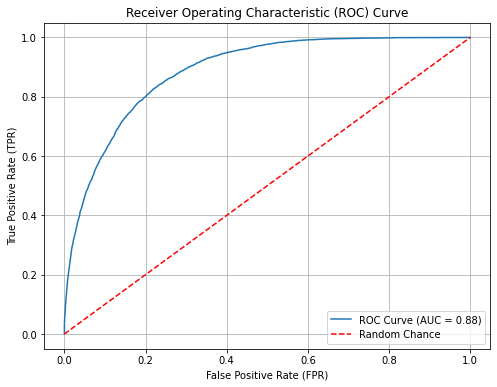

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

# Evaluate the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
roc_auc = evaluator.evaluate(pred_data)

# Get the ROC curve data
lr_model = pipelineModel.stages[-1]  
roc = lr_model.summary.roc.toPandas()

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Binary Classification Evaluation
bcEvaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
print(f"Area under ROC curve: {bcEvaluator.evaluate(pred_data)}")

# Multiclass Classification Evaluations
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(pred_data)}")

mcEvaluator = MulticlassClassificationEvaluator(metricName="weightedRecall")
print(f"Weighted Recall: {mcEvaluator.evaluate(pred_data)}")

mcEvaluator = MulticlassClassificationEvaluator(metricName="f1")
print(f"F1 score: {mcEvaluator.evaluate(pred_data)}")

mcEvaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")
print(f"Weighted Precision: {mcEvaluator.evaluate(pred_data)}")

# Confusion Matrix
predictionAndLabels = pred_data.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

confusionMatrix = metrics.confusionMatrix()
print("Confusion Matrix:")
print(confusionMatrix)

Area under ROC curve: 0.8832451799218509
Accuracy: 0.7680801850424056
Weighted Recall: 0.7680801850424055
F1 score: 0.6787860724667758
Weighted Precision: 0.8107215810397018


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
DenseMatrix([[4.904e+03, 4.000e+00],
             [1.500e+03, 7.700e+01]])


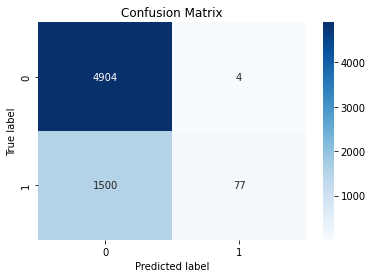

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get the confusion matrix as a NumPy array
confusionMatrix = metrics.confusionMatrix().toArray()
 
# Plot the confusion matrix as a heatmap
sns.heatmap(confusionMatrix, annot=True, fmt="g", cmap="Blues")
 
# Add labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
 
# Display the plot
plt.show()